In [2]:
import ipywidgets as widgets
from IPython import display
#from ipywidgets import Button, Layout
#import tkinter as tk
import numpy as np
from matplotlib import pyplot as plt
#from functools import partial
import pandas as pd
import xlrd
from datetime import datetime

In [3]:
covid_df = pd.read_csv(r'/Users/eileenyang/JupyterPython/Corona/covid_may25.csv')
covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
covidus_df = covid_df.groupby(['date']).sum()

covidus_df = covidus_df.reset_index()

covidus_df['date'] =  pd.to_datetime(covidus_df['date'])

covidus_df['totcases'] = covidus_df['cases']
covidus_df['totdeaths'] = covidus_df['deaths']

covidus_df.head()

,date,fips,cases,deaths,totcases,totdeaths
0,2020-01-21,53061.0,1,0,1,0
1,2020-01-22,53061.0,1,0,1,0
2,2020-01-23,53061.0,1,0,1,0
3,2020-01-24,70092.0,2,0,2,0
4,2020-01-25,76151.0,3,0,3,0


In [7]:
covidstate_df = covid_df.groupby(['date','state']).sum()

covidstate_df = covidstate_df.reset_index()

covidstate_df['date'] =  pd.to_datetime(covidstate_df['date'])

covidstate_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53061.0,1,0
1,2020-01-22,Washington,53061.0,1,0
2,2020-01-23,Washington,53061.0,1,0
3,2020-01-24,Illinois,17031.0,1,0
4,2020-01-24,Washington,53061.0,1,0


Text(0.5,1,'US COVID-19 Cases Over Time')

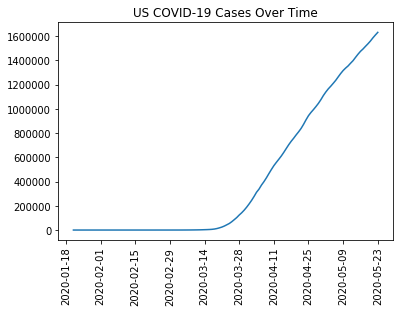

In [14]:
#graphing total cases in the US
covidus_df = covidus_df.sort_values('date', ascending=True)
plt.plot(covidus_df['date'], covidus_df['cases'])
plt.xticks(rotation='vertical')
plt.title("US COVID-19 Cases Over Time")


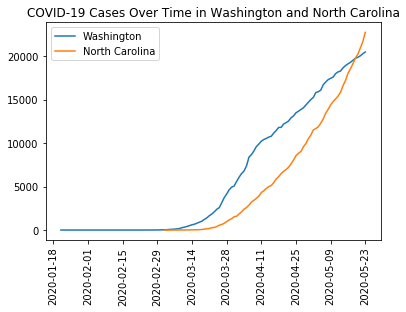

In [24]:
def state_compare(state1, state2):
    plt.plot(covidstate_df[covidstate_df['state']==state1]['date'],covidstate_df[covidstate_df['state']==state1]['cases'], label=state1)
    plt.plot(covidstate_df[covidstate_df['state']==state2]['date'],covidstate_df[covidstate_df['state']==state2]['cases'], label=state2)
    plt.xticks(rotation='vertical')
    plt.title("COVID-19 Cases Over Time in " +state1+ " and "+ state2)
    plt.legend(loc="upper left")
state_compare("Washington", "North Carolina")

In [25]:
covidus = covidus_df.drop(columns=['fips','cases','deaths'])
#print(covidus)
covidstate = covidstate_df.drop(columns=['fips'])
#print(covidstate)

covidall = covidus.merge(covidstate, on = ['date'])
covidall.head()

,date,totcases,totdeaths,state,cases,deaths
0,2020-01-21,1,0,Washington,1,0
1,2020-01-22,1,0,Washington,1,0
2,2020-01-23,1,0,Washington,1,0
3,2020-01-24,2,0,Illinois,1,0
4,2020-01-24,2,0,Washington,1,0


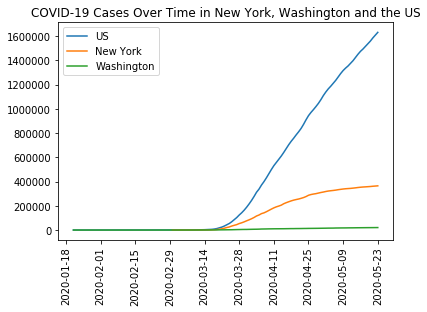

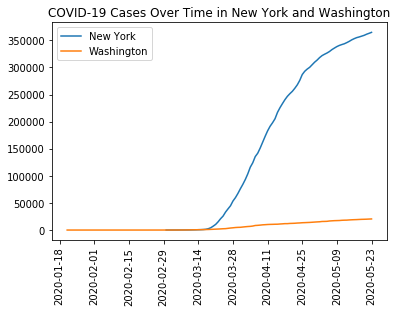

<Figure size 432x288 with 0 Axes>

In [28]:
#a function to compare two states as well as the US total, if desired
def state_compare2(state1, state2, us=None):

   # if state2=None:
   #     plt.plot(covidall['date'],covidall['totcases'])
   #     plt.plot(covidall[covidall['state']==state1]['date'],covidall[covidall['state']==state1]['cases'])

    if us is None:
        plt.plot(covidall[covidall['state']==state1]['date'],covidall[covidall['state']==state1]['cases'], label=state1)
        plt.plot(covidall[covidall['state']==state2]['date'],covidall[covidall['state']==state2]['cases'], label=state2)
        plt.xticks(rotation='vertical')
        plt.title("COVID-19 Cases Over Time in " +state1+ " and "+ state2)
        plt.legend(loc="upper left")
        plt.figure()

    else:
        plt.plot(covidall['date'],covidall['totcases'], label="US")
        plt.plot(covidall[covidall['state']==state1]['date'],covidall[covidall['state']==state1]['cases'], label=state1)
        plt.plot(covidall[covidall['state']==state2]['date'],covidall[covidall['state']==state2]['cases'], label=state2)
        plt.xticks(rotation='vertical')
        plt.title("COVID-19 Cases Over Time in " +state1+ ", "+ state2+" and the US")
        plt.legend(loc="upper left")
        plt.figure()
    
    
#now we call the function
state_compare2("New York", "Washington", "us")
state_compare2("New York", "Washington")

In [42]:
states = covidall['state'].unique()
states = sorted(states)
print(states)


dropdown1 = widgets.Dropdown(
    value='Alabama', 
    options=sorted(covidall['state'].unique()), 
    description='State 1'
)
dropdown2 = widgets.Dropdown(
    value='Alabama', 
    options=sorted(covidall['state'].unique()), 
    description='State 2'
)
checkbox = widgets.Checkbox(
    description='Include US Overall',
    value=True
)

widgets.VBox([dropdown1,dropdown2,checkbox])

def update(change):
    

#def show_change(change):
 #   display(change)

    
    


['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


NameError: name 'update' is not defined

In [45]:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

def f(a, b):
    display(a + b)
    return a+b

w = interactive(f, a=10, b=20)
display(w)


interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [49]:
def state_compare(state1, state2):
    plt.plot(covidstate_df[covidstate_df['state']==state1]['date'],covidstate_df[covidstate_df['state']==state1]['cases'], label=state1)
    plt.plot(covidstate_df[covidstate_df['state']==state2]['date'],covidstate_df[covidstate_df['state']==state2]['cases'], label=state2)
    plt.xticks(rotation='vertical')
    plt.title("COVID-19 Cases Over Time in " +state1+ " and "+ state2)
    plt.legend(loc="upper left")
    
w=interactive(state_compare, state1=sorted(covidall['state'].unique()), state2=sorted(covidall['state'].unique()))
display(w)

interactive(children=(Dropdown(description='state1', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Cal…

In [60]:
def state_compare2(State1, State2, US=True):

   # if state2=None:
   #     plt.plot(covidall['date'],covidall['totcases'])
   #     plt.plot(covidall[covidall['state']==state1]['date'],covidall[covidall['state']==state1]['cases'])

    if US is False:
        plt.plot(covidall[covidall['state']==State1]['date'],covidall[covidall['state']==State1]['cases'], label=State1)
        plt.plot(covidall[covidall['state']==State2]['date'],covidall[covidall['state']==State2]['cases'], label=State2)
        plt.xticks(rotation='vertical')
        plt.title("COVID-19 Cases Over Time in " +State1+ " and "+ State2)
        plt.legend(loc="upper left")
        plt.figure()

    else:
        plt.plot(covidall['date'],covidall['totcases'], label="US")
        plt.plot(covidall[covidall['state']==State1]['date'],covidall[covidall['state']==State1]['cases'], label=State1)
        plt.plot(covidall[covidall['state']==State2]['date'],covidall[covidall['state']==State2]['cases'], label=State2)
        plt.xticks(rotation='vertical')
        plt.title("COVID-19 Cases Over Time in " +State1+ ", "+ State2+" and the US")
        plt.legend(loc="upper left")
        plt.figure()

w2=interactive(state_compare2, State1=sorted(covidall['state'].unique()), State2=sorted(covidall['state'].unique()), US=True)
display(w2)

interactive(children=(Dropdown(description='State1', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Cal…